### Dataset : Heart Diseases ###


* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `sex` (Male/Female)
* `dataset` (place of study)
* `cp` chest pain type 
    - typical angina
    - atypical angina
    - non-anginal
    - asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm  Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute

In [2]:
#import libraries

# to handle the data
import pandas as pd 
import numpy as np 

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# to preprocess the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import SimpleImputer , KNNImputer

### importing iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split

# classification task
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# matrix
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

# pipeline and columnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


ModuleNotFoundError: No module named 'plotly'

In [67]:
# load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Performing EDA analysis ### 

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [69]:
# Data shape
df.shape

(920, 16)

In [70]:
# finding the highest and lowest age
df['age'].min(), df['age'].max()

(28, 77)

In [71]:
# describing the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

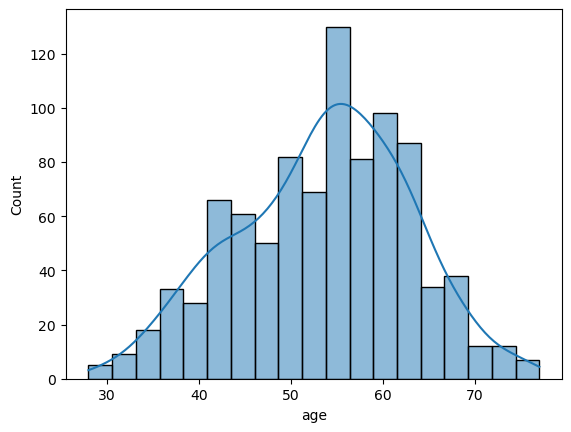

In [72]:
# visualize the age 
sns.histplot(x = df['age'],kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


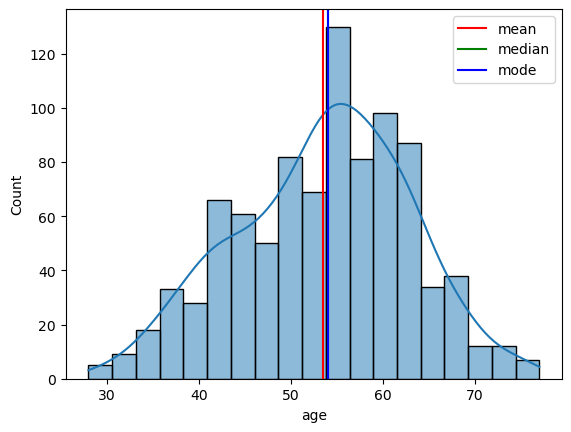

In [73]:
# plot the mean , median and mode on age columns
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='r',label='mean')
plt.axvline(df['age'].median(),color='g',label='median')
plt.axvline(df['age'].mode()[0],color='b',label='mode')
plt.legend()

# printing the values of mean ,median and mode
print('Mean:',df['age'].mean())

print('Median:',df['age'].median())

print('Mode:',df['age'].mode()[0])

In [74]:
# plot the age column on the basis of sex  
fig = px.histogram(data_frame= df , x='age',color='sex')
fig.show()

In [75]:
# value of the age column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [76]:
# finding the % of the male and female 
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate the %

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"The Percentage of Male {male_percentage:.2f}% ")
print(f"The Percentage of Female {female_percentage:.2f}% ")





The Percentage of Male 78.91% 
The Percentage of Female 21.09% 


In [77]:
# find the value count of the age column by grouping them together

df.groupby('sex')['age'].value_counts()


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [78]:
# Now dealing with dataset columns
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

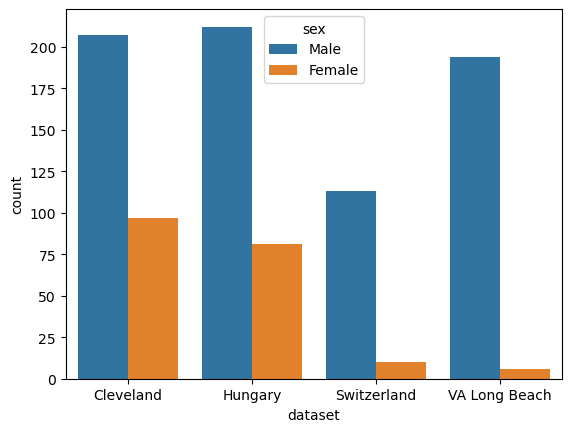

In [79]:
# plot the count plot of dataset column
sns.countplot(x ='dataset' , data=df , hue='sex' )

In [80]:
# ploting the graph on plotly for better understanding 
fig = px.bar(df , x='dataset',color='sex')
fig.show()

# groupby on the basis of dataset and sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [81]:
# plot the graph on age and coloring by dataset
fig = px.histogram(data_frame= df , x='age',color='dataset')
fig.show()

# mean , median , mode 
print(f"Mean : { df.groupby('dataset')['age'].mean()}")
print("-----------------------------")
print(f"Median :{df.groupby('dataset')['age'].median()}")
print("-----------------------------")
print(f"Mode : {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------
Median :dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------
Mode : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


### Explore the CP column

In [82]:
# value count 

df['cp'].value_counts()


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

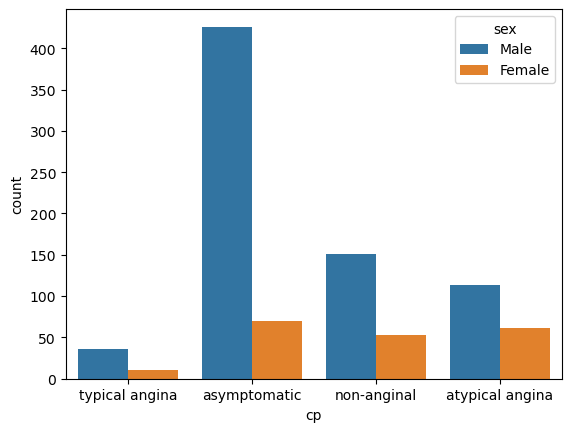

In [83]:
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

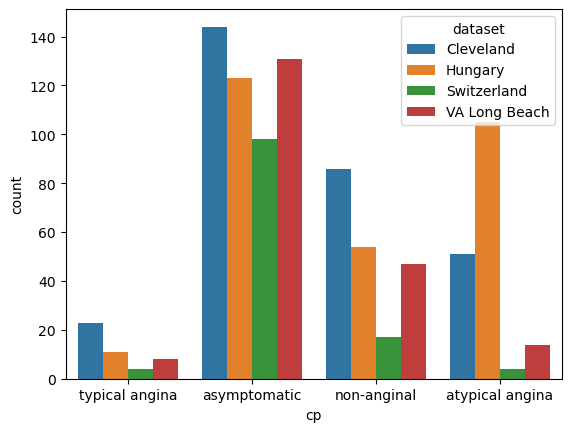

In [84]:
sns.countplot(df,x='cp',hue='dataset')

In [85]:
# plot the CP on the basis of age column

fig = px.histogram(data_frame= df , x='age',color='cp')
fig.show()

### Exploring the trestbps (Resting Blood Pressure) ###
# the Normal Blood Pressure is 120/80 mm hg

In [86]:
# value counts 
df['trestbps'].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

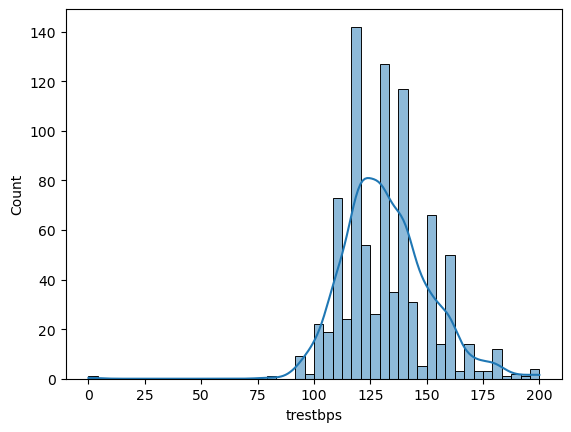

In [87]:
# Histplot on trestbps (Resting Blood Pressure)

sns.histplot(df,x='trestbps',kde=True)

In [88]:
# deal with the missing values
df['trestbps'].isnull().mean() * 100
print(f'The Percentage of missing values in trestbps column is : {df["trestbps"].isnull().mean() * 100:.2f}%')

The Percentage of missing values in trestbps column is : 6.41%


In [89]:
# impute the missing values

imputer_1 = IterativeImputer(max_iter=10,random_state=42)

imputer_1.fit(df[['trestbps']])

df['trestbps'] = imputer_1.transform(df[['trestbps']])

# deal with the missing values
print(f'The Percentage of missing values in trestbps column is : {df["trestbps"].isnull().sum()}')


The Percentage of missing values in trestbps column is : 0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [91]:
# imputing the numarical values 

imputer_2 = IterativeImputer(max_iter=10,random_state=42)

df[['chol','oldpeak','ca','thalch']] = imputer_2.fit_transform(df[['chol','oldpeak','ca','thalch']])

In [92]:
# missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

# Impute the Object columns


In [93]:
df['thal'].isnull().sum()
print(f'The Percentage of missing values in thal column is : {df["thal"].isnull().mean() * 100:.2f}%')
print(f'The missing values in thal column is : {df["thal"].isnull().sum()}')

The Percentage of missing values in thal column is : 52.83%
The missing values in thal column is : 486


In [94]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

# Output 

* Mostly people got heart Disease in the age of 52-54 
* The Min age of the Heart Disease is 28
* Most of the Male and Female got heart disease in the age of 54 - 55
* The highest reporting Hearth Disease are from `Cleveland: 304` and  lower are from the `Switzerland : 123`  
* The highest reporting of female are from `Cleveland:97` and male are from the `Hungary: 212`
* The Lowest reporting of female are from `VA Long Beach:6` and lower are from the `Switzerland : 113`
* The average of `Cleveland` ,`Switzerland `,`VA Long Beach` is in the range of 54-59 but the `hungary` have the lowest average age 47.89
* The large number of Heart Disease caused by `Having no signs or symptoms of disease in all origin` and some cases were recorded in `Hungary` due to `atypical angina`
